# IFN619 - Assignment 1 - Part B

## Foundational Techniques

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Complete the full **QDAVI** data analytics cycle for both questions. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
4. Ensure that your code runs without errors, and that your results are appropriate for the question.
5. Use comments in your code to explain what you are doing

In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = "Brendan" 
last_name = "Wallace-Nash"
student_number = "n9993304"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---

## QUESTION 1

#### Question: 

Using *Queensland Health* waste water surveilance data, identify regions where genetic material has been detected in waste water over a 6 month period. What insights could be gained from this data and how might the Queensland Government use them?

#### Data:

[Queensland wastewater surveillance for SARS-CoV-2 in 2020](https://www.data.qld.gov.au/dataset/queensland-wastewater-surveillance-for-sars-cov-2-in-2020/resource/0e7a7d67-435c-4d24-9e6f-23c28a6a8cff)

### 1.1.1 Question 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The scope of the question I will be trying to answer is which of the water treatment centres in Queensland on average has had the most detection results for SARS-CoV-2 in their water. The water treatment centres used in the data will be the 41 public water centres listed in data provided by *Queensland Health*. It should be noted that the Watergate centres do not just treat wastewater for the areas of their namesake as they can treat wastewater for multiple locations within its catchment. The variable result will refer to the result of the testing for SARS-CoV-2, which are listed as detected for a positive test of SARS-CoV-2 and non-detect for a negative test for SARS-CoV-2. This analysis will provide beneficial to *Queensland health* as it will give an insight on the location of water treatment centre which has reported the highest average detection of SARS-CoV-2. I will be using *Queensland Health* wastewater surveillance data to provide insight into SARS-CoV-2 detection in Queensland water centres. 


### 1.2.1 Data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The main variables from the *Queensland Health* wastewater surveillance data that I will be looking at are the site location and the result of the detection of SARS-CoV-2. I will organise the data by indexing the site against the detection result, this will allow me to manipulate the sites I am focusing on better. I have dropped all other variables from the dataset as they currently will not be used. There is missing data in the variable notes but as I am not using this variable it will not be a problem. I will also be assuming that the detection threshold for SARS-CoV-2 will be the same at all water treatment plants. I have also mapped the number 0 to non-detect and 1 to detect so mathematical calculations can be performed on the result variables in the analysis stage.


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
filename = "QLD_watersurveilance.csv" 
colname = "Site" 

qld_water = pd.read_csv(filename, index_col= colname)
qld_water.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, Coombabah to Wacol
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sampling date    727 non-null    object 
 1   Result           727 non-null    object 
 2   Site population  712 non-null    float64
 3   Notes            262 non-null    object 
dtypes: float64(1), object(3)
memory usage: 28.4+ KB


In [3]:
qld_water_population=qld_water.drop(columns=['Sampling date', 'Result', 'Notes'])

In [4]:
qld_water_population

,Site population
Site,
Coombabah,238437.0
Elanora,65315.0
Loganholme,205541.0
Merrimac,151839.0
Pimpama,43595.0
...,...
Wacol,38072.0
Warwick,12604.0
Carole Park,9404.0


In [5]:
qld_water_population = qld_water_population[['Site population']].groupby('Site',sort=True).mean()
qld_water_population = qld_water_population.sort_values(by=['Site population'], ascending =False)
qld_water_population

,Site population
Site,
Luggage Point,504529.0
Coombabah,238437.0
Oxley Creek,231643.0
Loganholme,205541.0
Gibson Island,198244.0
Merrimac,151839.0
Sandgate,100673.0
Maroochydore,88540.0
Bundamba,84942.0


In [6]:
qld_water_population

,Site population
Site,
Luggage Point,504529.0
Coombabah,238437.0
Oxley Creek,231643.0
Loganholme,205541.0
Gibson Island,198244.0
Merrimac,151839.0
Sandgate,100673.0
Maroochydore,88540.0
Bundamba,84942.0


In [7]:
qld_water=qld_water.drop(columns=['Sampling date', 'Site population', 'Notes'])

In [8]:
qld_water['Result_mean'] = qld_water.Result.map({"Non_detect":0, "Detect":1})
qld_water

,Result,Result_mean
Site,,
Coombabah,Non-detect,NaN
Elanora,Detect,1.0
Loganholme,Detect,1.0
Merrimac,Non-detect,NaN
Pimpama,Detect,1.0
...,...,...
Wacol,Non-detect,NaN
Warwick,Detect,1.0
Carole Park,Non-detect,NaN


In [9]:
values = {'Result_mean': 0}
qld_water_int = qld_water.fillna(value=values)
qld_water_int

,Result,Result_mean
Site,,
Coombabah,Non-detect,0.0
Elanora,Detect,1.0
Loganholme,Detect,1.0
Merrimac,Non-detect,0.0
Pimpama,Detect,1.0
...,...,...
Wacol,Non-detect,0.0
Warwick,Detect,1.0
Carole Park,Non-detect,0.0


### 1.3.1 Analysis
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The data provided by *Queensland Health* is structured data. I have grouped the data frame by site and then calculated the mean of the result variable for each site. I have used mean as the measure of result as some sites have been tested more frequently than others which would affect the validity of the analysis if I were to only sum of all detected results. By accounting for the disproportional amount of testing on some sites I can provide *Queensland Health* with a more validated insights about which site has the highest average frequency of SARS-CoV-2 detection in Queensland.

In [118]:
qld_water_mean = qld_water_int[['Result_mean']].groupby('Site',sort=True).mean()
qld_water_mean = qld_water_mean.sort_values(by=['Result_mean'], ascending =False)
qld_water_mean

,Result_mean
Site,
Coombabah,0.322581
Goodna,0.314286
Redcliffe,0.250000
Nambour,0.250000
Fairfield,0.240000
Wynnum,0.230769
Cairns North,0.230769
Loganholme,0.200000
Elanora,0.193548


### 1.4.1 Visualisation
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A bar graph was chosen to visualise the results of my analysis as it demonstrates the difference in average detection results of SARS-CoV-2 for each wastewater treatment centre in Queensland. Not only does the graph demonstrate the wastewater treatment centres that have the largest mean detection of SARS-CoV-2 but it will also show the centres that have reported a low average detection result and, in some cases, showing that some site that reported no detection of SARS-CoV-2. As the variables for result were mapped to the number 0 and 1 the mean also shows the percentage of detection for each site. The bar graph clearly indicates that Coombahbah had the highest average amounto of positve SARS-CoV-2 detection.   

<AxesSubplot:title={'center':'Mean detection of SARS-CoV-2 in Queensland Water treatment centres'}, xlabel='Site', ylabel='Mean detection of SARS-CoV-2'>

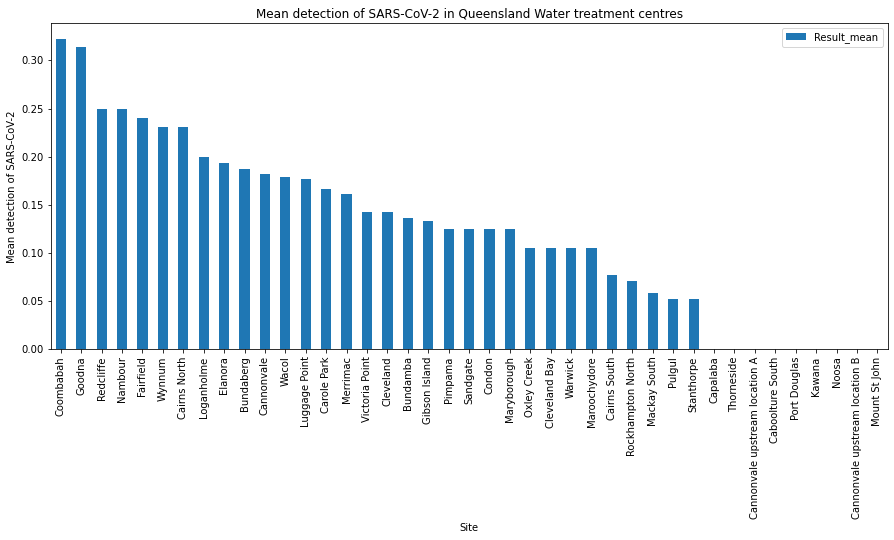

In [11]:
qld_water_mean = qld_water_mean.sort_values(by=['Result_mean'], ascending =False)

qld_water_mean.plot(kind='bar', figsize=(15,6), ylabel = "Mean detection of SARS-CoV-2", title = "Mean detection of SARS-CoV-2 in Queensland Water treatment centres")

### 1.5.1 Insight
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The results of my analysis show that the wastewater treatment centre with the highest average detection of SARS-CoV-2 is the Coombabah wastewater centre, with a detection of SARS-CoV-2 on 32.25% of wastewater testing results. My recommendation to *Queensland Health* would be to focus resources into the areas that the Coombahbah Wastewater centre treats water for as these are likely hotspots for SARS-CoV-2. I would also recommend focussing on other areas with high average detections as they too could become more problematic if there are not efforts to maintain the spread of SARS-CoV-2 in the areas that supply wastewater to these centres.

### 1.2.2 Question

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In my first cycle of the QDAVI cycle I just wanted to find out the wastewater treatment centre site with the highest average detection of SARS-CoV-2. In this cycle I aim to derive a more meaningful insight from the data provided. The scope of the question I will be trying to answer is, what does the geographical location of Queensland say about the rate of detection of SARS-CoV-2 in water treatment centres? 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I will be defining the geographical locations of Queensland as south Queensland (all water treatment centres south of Mackay) and north Queensland (all water treatment centres north of Mackay). The decision to split the locations into North and South Queensland was made because North and South Queensland are locations that differ in many ways that could provide insight into what variables could be predicting factors to outbreaks of SARS-Cov-2. For example, south Queensland shares a busy boarder with New South Wales, appose to the less busy boarder between north Queensland and the Northern Territory. South Queensland is also home to two international airports, with one being the state’s largest airport for international travel, appose to north Queensland that only has the one international airport that provides limited amount of flights. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I will be measuring the rate of detection of SARS-CoV-2 as the mean number of detection across all water treatment centres for both north and south Queensland. Mean again is being used as the measure to control for the disproportional amount of testing for some sights. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This analysis will provide relevant information to *Queensland Health* as it will demonstrate which geographical location is more prone to outbreaks of SARS-CoV-2, and possibly lead to inferences about how geological position can effect he spread of SARS-CoV-2. I will be using *Queensland Health* waste water surveillance data to provide insight into SARS-CoV-2 detection in Queensland water centres and to address my question.


### 1.2.2 Data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I again will only be using the Site and Result data from the structured data provided b *Queensland Health* waste water surveillance data. This will also account for the missing data in variables like Notes. I will also be mapping binary variables to Result. The main change in the data preparation from this cycle compared to the last is I will be breaking the data frame up into north Queensland(nth_qld) and south Queensland(sth_qld). I sorted locations into north and south Queensland depending on whether the site sits north or south of Mackay (most commonly regarded land mark between north and south Queensland). Splitting the data into north and south Queensland will allow for greater accuracy in comparing analysis of Results, which will lead to a more valid answer to the question of geographical effects on SARS-CoV-2 outbreaks.

In [12]:
filename = "QLD_watersurveilance.csv" 
colname = "Site" #making site name the index column

# Read in the percent of gdp data
qld_water2 = pd.read_csv(filename, index_col= colname)
qld_water2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, Coombabah to Wacol
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sampling date    727 non-null    object 
 1   Result           727 non-null    object 
 2   Site population  712 non-null    float64
 3   Notes            262 non-null    object 
dtypes: float64(1), object(3)
memory usage: 28.4+ KB


In [13]:
qld_water2=qld_water2.drop(columns=['Sampling date', 'Site population', 'Notes'])

In [14]:
qld_water2

,Result
Site,
Coombabah,Non-detect
Elanora,Detect
Loganholme,Detect
Merrimac,Non-detect
Pimpama,Detect
...,...
Wacol,Non-detect
Warwick,Detect
Carole Park,Non-detect


In [15]:
qld_water2['Result_binary'] = qld_water2.Result.map({"Non_detect":0, "Detect":1})
qld_water2

,Result,Result_binary
Site,,
Coombabah,Non-detect,NaN
Elanora,Detect,1.0
Loganholme,Detect,1.0
Merrimac,Non-detect,NaN
Pimpama,Detect,1.0
...,...,...
Wacol,Non-detect,NaN
Warwick,Detect,1.0
Carole Park,Non-detect,NaN


In [16]:
values = {'Result_binary': 0}
qld_water_int2 = qld_water2.fillna(value=values)
qld_water_int2

,Result,Result_binary
Site,,
Coombabah,Non-detect,0.0
Elanora,Detect,1.0
Loganholme,Detect,1.0
Merrimac,Non-detect,0.0
Pimpama,Detect,1.0
...,...,...
Wacol,Non-detect,0.0
Warwick,Detect,1.0
Carole Park,Non-detect,0.0


In [17]:
nth_qld = qld_water_int2.drop(["Coombabah","Elanora", "Loganholme","Merrimac","Pimpama", "Goodna","Oxley Creek", "Bundamba", "Carole Park", "Fairfield", "Gibson Island", "Luggage Point","Sandgate","Wacol","Wynnum", "Maroochydore", "Noosa", "Stanthorpe", "Warwick", "Caboolture South", "Nambour", "Redcliffe", "Capalaba", "Cleveland", "Thorneside", "Victoria Point"])
sth_qld = qld_water_int2.drop(["Cairns North","Cairns South", "Mackay South","Cannonvale","Cleveland Bay", "Pulgul","Bundaberg","Rockhampton North","Cannonvale upstream location A","Cannonvale upstream location B","Condon","Kawana","Mount St John", "Port Douglas","Maryborough"])

In [18]:
nth_qld

,Result,Result_binary
Site,,
Cairns North,Non-detect,0.0
Cairns South,Non-detect,0.0
Cairns North,Non-detect,0.0
Cairns South,Non-detect,0.0
Cairns North,Non-detect,0.0
...,...,...
Pulgul,Non-detect,0.0
Bundaberg,Detect,1.0
Cairns North,Detect,1.0


In [19]:
sth_qld

,Result,Result_binary
Site,,
Coombabah,Non-detect,0.0
Elanora,Detect,1.0
Loganholme,Detect,1.0
Merrimac,Non-detect,0.0
Pimpama,Detect,1.0
...,...,...
Wacol,Non-detect,0.0
Warwick,Detect,1.0
Carole Park,Non-detect,0.0


### 1.3.2 Analysis
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Mean will again be used as the measure of Results for the analysis. As previously stated there is a disproportional amount of testing for different sites, but also the disproportional number of sites in south Queensland could affect the validity of the data if I were to just measure the amount of detection in each geographical location. I have grouped the Sites together for each state and then calculated the mean for each site and then an overall mean for *Results* for each both *south Queensland* and *north Queensland*, which will show the percentage of *Detection* in testing for all sites in that geographical location. As stated in the last cycle, due to the *Results* being binary the mean also demonstrates the percentage of *Detected* *Results* for the amount of time the site was tested. This will provide an analysis of the percentage each site *Results* showing a *Detected* and also showing the *Detection* percentage for both *South Queensland* and *North Queensland*.

In [20]:
sth_qld_mean = sth_qld[['Result_binary']].groupby('Site',sort=True).mean()

In [21]:
sth_qld_mean

,Result_binary
Site,
Bundamba,0.136364
Caboolture South,0.000000
Capalaba,0.000000
Carole Park,0.166667
Cleveland,0.142857
Coombabah,0.322581
Elanora,0.193548
Fairfield,0.240000
Gibson Island,0.133333


In [22]:
nth_qld_mean = nth_qld[['Result_binary']].groupby('Site',sort=True).mean()

In [23]:
nth_qld_mean

,Result_binary
Site,
Bundaberg,0.187500
Cairns North,0.230769
Cairns South,0.076923
Cannonvale,0.181818
Cannonvale upstream location A,0.000000
Cannonvale upstream location B,0.000000
Cleveland Bay,0.105263
Condon,0.125000
Kawana,0.000000


In [137]:
qld_sort

Result_binary  \
                 Site                                            
South_Queensland Coombabah                            0.322581   
                 Goodna                               0.314286   
                 Nambour                              0.250000   
                 Redcliffe                            0.250000   
                 Fairfield                            0.240000   
                 Wynnum                               0.230769   
North_Queensland Cairns North                         0.230769   
South_Queensland Loganholme                           0.200000   
                 Elanora                              0.193548   
North_Queensland Bundaberg                            0.187500   
                 Cannonvale                           0.181818   
South_Queensland Wacol                                0.178571   
                 Luggage Point                        0.176471   
                 Carole Park                          0.166667   
                 Merrimac                             0.161290   
                 Cleveland                            0.142857   
                 Victoria Point                       0.142857   
                 Bundamba                             0.136364   
                 Gibson Island                        0.133333   
                 Sandgate                             0.125000   
North_Queensland Condon                               0.125000   
                 Maryborough                          0.125000   
South_Queensland Pimpama                              0.125000   
North_Queensland Cleveland Bay                        0.105263   
South_Queensland Oxley Creek                          0.105263   
                 Warwick                              0.105263   
                 Maroochydore                         0.105263   
North_Queensland Cairns South                         0.076923   
                 Rockhampton North                    0.071429   
                 Mackay South                         0.058824   
                 Pulgul                               0.052632   
South_Queensland Stanthorpe                           0.052632   
                 Thorneside                           0.000000   
North_Queensland Cannonvale upstream location A       0.000000   
                 Cannonvale upstream location B       0.000000   
South_Queensland Caboolture South                     0.000000   
                 Noosa                                0.000000   
North_Queensland Kawana                               0.000000   
South_Queensland Capalaba                             0.000000   
North_Queensland Mount St John                        0.000000   
                 Port Douglas                         0.000000   

                                                              Key  
                 Site                                              
South_Queensland Coombabah                       South_Queensland  
                 Goodna                          South_Queensland  
                 Nambour                         South_Queensland  
                 Redcliffe                       South_Queensland  
                 Fairfield                       South_Queensland  
                 Wynnum                          South_Queensland  
North_Queensland Cairns North                    North_Queensland  
South_Queensland Loganholme                      South_Queensland  
                 Elanora                         South_Queensland  
North_Queensland Bundaberg                       North_Queensland  
                 Cannonvale                      North_Queensland  
South_Queensland Wacol                           South_Queensland  
                 Luggage Point                   South_Queensland  
                 Carole Park                     South_Queensland  
                 Merrimac                        South_Queensland  
                 Cleveland                       South

In [24]:
sth_qld_mean.mean()

Result_binary    0.148385
dtype: float64

In [25]:
nth_qld_mean.mean()

Result_binary    0.08101
dtype: float64

## 1.4.2 Visualisation
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A bar graph was chosen again to visualise the results of my analysis as it demonstrates the difference in average detection results of SARS-CoV-2 for each wastewater treatment centre in both *south Queensland* and *north Queensland*. The graph shows how south Queensland sites make up a majority of the the highest detection rate of SARS-CoV-2 and also shows the larger number of wastewater treatment sites in *south Queensland* then *north Queensland*

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the mean *Results* of SARS-CoV-2 in all *Sites* for *south Queensland* and *north Queensland* a bar graph was again used. This is the most valuable visualisation in regards to answering my proposed question as this bar graph demonstrates the difference in mean *Results* for all *Sites* in both geographical locations of Queensland. It is clear that on average the sites in south Queensland reported a higher rate of detection (14.83%) on average appose to that of north Queensland(8.1%).

<AxesSubplot:title={'center':'Mean detection of SARS-CoV-2 in Queensland Water treatment centres'}, xlabel='Wastewater Site', ylabel='Mean detection of SARS-CoV-2'>

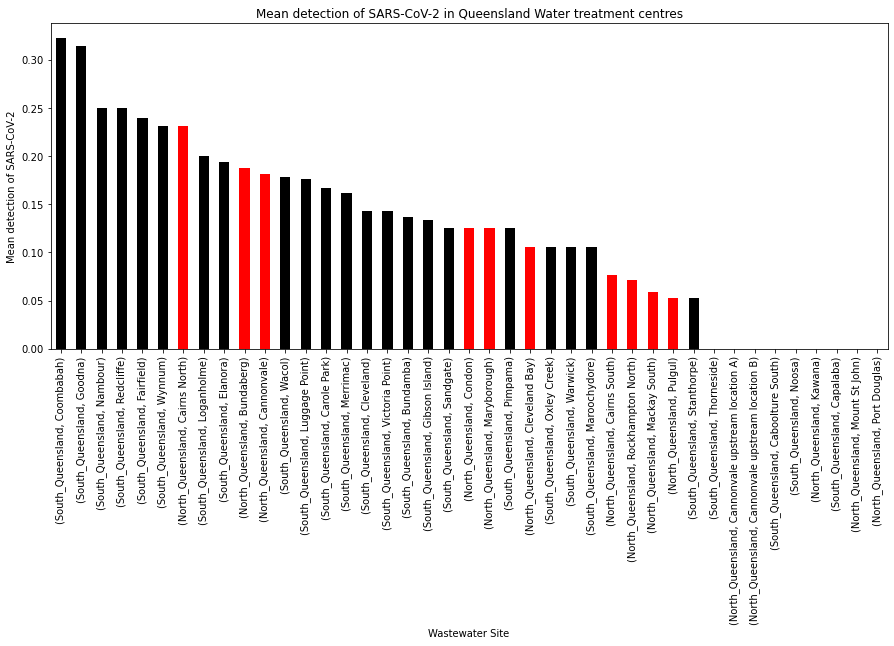

In [26]:
sth_qld_mean['Key'] = 'South_Queensland'
nth_qld_mean['Key'] = 'North_Queensland'
qld_mean = pd.concat([sth_qld_mean,nth_qld_mean],keys=['South_Queensland','North_Queensland'])

qld_sort = qld_mean.sort_values(by=['Result_binary'], ascending =False)

qld_sort['Result_binary'].plot(kind = 'bar', figsize=(15,6), xlabel = "Wastewater Site", ylabel = "Mean detection of SARS-CoV-2", title = "Mean detection of SARS-CoV-2 in Queensland Water treatment centres", color=['black', 'black', 'black', 'black', 'black', 'black', 'red', 'black', 'black', 'red', 'red', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'red', 'red', 'black', 'red', 'black', 'black', 'black', 'red', 'red', 'red', 'red', 'black', 'black', 'red', 'red', 'black', 'black', 'red', 'black', 'red', 'red'])


In [27]:
both_mean = pd.DataFrame({'North Queensland mean':0.08101,'South Queensland Mean':0.148385}, index=list("."))

<AxesSubplot:title={'center':'Mean number of positive SARS-CoV-2 detection in Queensland water Sites'}, xlabel='Location', ylabel='Mean detection of SARS-CoV-2'>

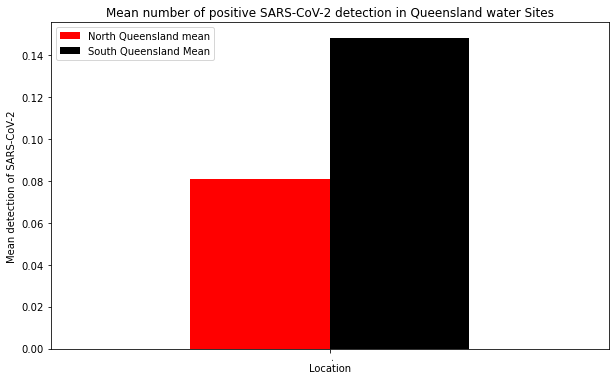

In [116]:
both_mean.plot(kind="bar", figsize=(10,6), xlabel="Location", ylabel = "Mean detection of SARS-CoV-2", title="Mean number of positive SARS-CoV-2 detection in Queensland water Sites", color=['red', 'black'])

### 1.5.1 Insight
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The results of my analysis have answered my proposed question as it can be seen that on overage wastewater sites in *south Queensland* detected SARS-CoV-2 at a higher rate than *north Queensland*. *South Queensland* *Sites* *detected* SARS-CoV-2 on 14.84% of test. This appose to the 8.1% percent of *detected* *Results* from testing in *north Queensland* wastewater treatment centres. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As my analysis has shown that on average *south Queensland* wastewater *Sites* average the highest *detection* of SARS-CoV-2 I would recommend focusing efforts to restrict SARS-CoV-2 outbreak in *south Queensland*. As stated in the proposition for this analysis I would also recommend looking into geological factors that defer between both *north and south Queensland*, such as *south Queensland* having more international airports and busier boarders as factors to the higher rate of SARS-CoV-2 detection. Focusing strategies on these to variables (i.e. boarder closure) could reduce the spread of SARS-CoV-2 coming from out of state and bring *south Queensland's* *detection* rate down to a *detection* *result* rate that is seen in *north Queensland*

---
## QUESTION 2

#### Question: 
Using *The Guardian* API, compare this year's headlines about COVID between Australia and the UK. What can we learn about how the pandemic is impacting Australia and UK?

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import requests
import json

### 2.1 Question

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Does the United Kingdom being a travel hub for the world make the country more Concernful of the numerous new COVID-19 variants appearing all over the world, then a country like Australia that is more remote and accommodates less flight paths? Furthermore, does a country concern of the new COVID-19 variants lead to a greater consideration for quarantining? The importance of this question is to demonstrate the difference in public opinion of these two nations and then establish if the public opinion of a country can be a predictor to another public opinion.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To establish a countries concern of new COVID-19 variants I will be analysing the amount of times "variant" appears in each countries newspaper headlines this year and compare them against each other. To establish if a higher concern of COVID-19 variants leads to a higher consideration of quarantine. I will be again analysing the amount of times each countries newspapers headline features the word "quarantine" and measure that number against the number of appearances for "variant" for that country.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This analysis will prove relevant for Government officials who would be able to gauge media perception on how the country is perceiving the treat of new COVID-19 variants and how that differs between countries. Establishing the difference between the two countries could prove insightful as the two countries differ in both geographical location, travel frequency and perception of COVID-19. Furthermore, establishing a link between the presence of "variant" in headlines and frequency of "quarantine" in headlines could provide insight in how a country considers copping with new variants. The difference between the frequency of "quarantine" between Australia and United Kingdom could provide insight into whether a country like the United Kingdom, who has been in lockdown for most of 2020 still consider quarantine a valid method of controlling new variants. This compared to a country like Australia who for the most parts citizen did not enter into a lengthy lockdown.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To address this question I will be using data from the Guardian Open Source API. I will be using the national production for each country to filter headlines for only the specific country in question for each month of this year.



### 2.2 Data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I will be using the *Guardian API* to retrieve information about published articles by the organisation. The query word used for the search of the API was COVID and I filtered the API publication to at first only produce API's with articles from the United Kingdom and then for Australia. For each country there was a total of three API's, each one indicating one of the first three months of the year. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I will be loading structured data from the API converting it into semi-structured data in a json format by using the getData function I made. The data retrieved from the API will have the max number of responses allowed by the API (200). Once the data is loaded as a json dataset it is then declared to a new variable. The section of the json file 'results' was declared to a variable as 'results' held important information such as web title and publication date. then to further clean the data was done as just the web titles were extracted using a for loop. The result of this for loop put the web page title into a list so I created a function to make the list a string so the article headlines from this year were ready to be analysed. These steps were done for all 6 API’s to clean and prepare the data.


In [30]:
key = 'a330a5bd-a5e8-4304-aba7-8e3ede9bc452'

In [31]:
def getData(url):
    content = requests.get(url)
    data = json.loads(content.content)
    return data

In [32]:
cov_uk_jan = getData('https://content.guardianapis.com/search?production-office=UK&from-date=2021-01-01&to-date=2021-02-01&page-size=200&q=COVID&api-key='+key)

In [33]:
cov_uk_jan

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1965,
  'startIndex': 1,
  'pageSize': 200,
  'currentPage': 1,
  'pages': 10,
  'orderBy': 'relevance',
  'results': [{'id': 'lifeandstyle/2021/jan/10/does-vitamin-d-combat-covid',
    'type': 'article',
    'sectionId': 'lifeandstyle',
    'sectionName': 'Life and style',
    'webPublicationDate': '2021-01-10T11:00:49Z',
    'webTitle': 'Does vitamin D combat Covid?',
    'webUrl': 'https://www.theguardian.com/lifeandstyle/2021/jan/10/does-vitamin-d-combat-covid',
    'apiUrl': 'https://content.guardianapis.com/lifeandstyle/2021/jan/10/does-vitamin-d-combat-covid',
    'isHosted': False,
    'pillarId': 'pillar/lifestyle',
    'pillarName': 'Lifestyle'},
   {'id': 'society/2021/jan/24/alls-not-fair-in-covid-vaccination-strategy',
    'type': 'article',
    'sectionId': 'society',
    'sectionName': 'Society',
    'webPublicationDate': '2021-01-24T17:18:25Z',
    'webTitle': 'All’s not fair in Covid vaccination strate

In [34]:
cov_uk_jan_results = cov_uk_jan['response']['results']

In [35]:
cov_uk_jan_results

[{'id': 'lifeandstyle/2021/jan/10/does-vitamin-d-combat-covid',
  'type': 'article',
  'sectionId': 'lifeandstyle',
  'sectionName': 'Life and style',
  'webPublicationDate': '2021-01-10T11:00:49Z',
  'webTitle': 'Does vitamin D combat Covid?',
  'webUrl': 'https://www.theguardian.com/lifeandstyle/2021/jan/10/does-vitamin-d-combat-covid',
  'apiUrl': 'https://content.guardianapis.com/lifeandstyle/2021/jan/10/does-vitamin-d-combat-covid',
  'isHosted': False,
  'pillarId': 'pillar/lifestyle',
  'pillarName': 'Lifestyle'},
 {'id': 'society/2021/jan/24/alls-not-fair-in-covid-vaccination-strategy',
  'type': 'article',
  'sectionId': 'society',
  'sectionName': 'Society',
  'webPublicationDate': '2021-01-24T17:18:25Z',
  'webTitle': 'All’s not fair in Covid vaccination strategy',
  'webUrl': 'https://www.theguardian.com/society/2021/jan/24/alls-not-fair-in-covid-vaccination-strategy',
  'apiUrl': 'https://content.guardianapis.com/society/2021/jan/24/alls-not-fair-in-covid-vaccination-strat

In [36]:
isHosated_uk_jan = []
for result in cov_uk_jan_results:
    isHosated_uk_jan.append(result['webTitle'])
isHosated_uk_jan

['Does vitamin D combat Covid?',
 'All’s not fair in Covid vaccination strategy',
 'Nicaragua’s Covid story far from truth | Letter',
 'Hot tip to tackle the Covid blues | Brief letters',
 'Care homes can’t cope with Covid patients | Letter',
 "India begins world's biggest Covid vaccination programme",
 'Germany challenges AstraZeneca Covid vaccine efficacy reports',
 'Schools provide data on Covid every day | Letters',
 'Grenfell Tower inquiry suspended because of Covid',
 'Roaring 20s: fashion world predicts post-Covid boom',
 "What's the difference between all the Covid vaccines?",
 "'It’s disappointing': Britons frustrated at Covid quarantine rules",
 'EU’s creative sector ‘faces economic devastation\xa0from Covid’',
 "Hoarding Covid vaccines 'could cost wealthy countries $4.5tn'",
 'Construction sites are aiding spread of Covid | Letters',
 'Sadiq Khan declares Covid emergency in London',
 'Glastonbury 2021 officially cancelled due to Covid pandemic',
 "Daily Covid testing plans '

In [37]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 

In [38]:
uk_jan_str = listToString(isHosated_uk_jan)

In [39]:
uk_jan_str

"Does vitamin D combat Covid?All’s not fair in Covid vaccination strategyNicaragua’s Covid story far from truth | LetterHot tip to tackle the Covid blues | Brief lettersCare homes can’t cope with Covid patients | LetterIndia begins world's biggest Covid vaccination programmeGermany challenges AstraZeneca Covid vaccine efficacy reportsSchools provide data on Covid every day | LettersGrenfell Tower inquiry suspended because of CovidRoaring 20s: fashion world predicts post-Covid boomWhat's the difference between all the Covid vaccines?'It’s disappointing': Britons frustrated at Covid quarantine rulesEU’s creative sector ‘faces economic devastation\xa0from Covid’Hoarding Covid vaccines 'could cost wealthy countries $4.5tn'Construction sites are aiding spread of Covid | LettersSadiq Khan declares Covid emergency in LondonGlastonbury 2021 officially cancelled due to Covid pandemicDaily Covid testing plans 'paused' in English schoolsFrench minister criticises UK's 'risky' Covid vaccine strate

In [40]:
cov_uk_feb = getData("https://content.guardianapis.com/search?production-office=UK&from-date=2021-02-01&to-date=2021-03-01&page=1&page-size=200&q=COVID&api-key="+key)

In [41]:
cov_uk_feb_results = cov_uk_feb['response']['results']

In [42]:
cov_uk_feb_results

[{'id': 'world/2021/feb/03/covid-variants-dont-have-nationalities',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-02-03T18:01:45Z',
  'webTitle': 'Covid variants don’t have nationalities | Brief letters',
  'webUrl': 'https://www.theguardian.com/world/2021/feb/03/covid-variants-dont-have-nationalities',
  'apiUrl': 'https://content.guardianapis.com/world/2021/feb/03/covid-variants-dont-have-nationalities',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'world/2021/feb/18/coronavirus-vaccine-programme-working-scotland-nicola-sturgeon-says',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-02-18T15:45:24Z',
  'webTitle': "'Compelling evidence' Covid vaccinations working, Sturgeon says",
  'webUrl': 'https://www.theguardian.com/world/2021/feb/18/coronavirus-vaccine-programme-working-scotland-nicola-sturgeon-says',
  'apiUrl': 'https://con

In [43]:
isHosated_uk_feb = []
for result in cov_uk_feb_results:
    isHosated_uk_feb.append(result['webTitle'])

In [44]:
isHosated_uk_feb

['Covid variants don’t have nationalities | Brief letters',
 "'Compelling evidence' Covid vaccinations working, Sturgeon says",
 'UK passes 10m Covid vaccination milestone',
 'Watchdog criticises how UK government appointed Covid ‘tsars’  ',
 'Covid claims 500,000 American lives | First Thing',
 'Rabbis warn over Purim celebrations Covid risk',
 'Shining a light on rotten Covid contract process | Letters',
 'Has Covid changed the price of a life?',
 'Who has received the Covid vaccine so far?',
 'How technology is powering Covid-19 investigations',
 "Welsh first minister criticises UK's Covid quarantine plan",
 'Will bad leadership on Covid go unpunished?',
 'When could Wales ease its Covid lockdown measures?',
 'UK minister defends delay over Covid quarantine hotels',
 'One million Covid vaccine doses administered in Wales',
 'Are your children taking part in Covid vaccine trials? ',
 'UK factory production slows amid Brexit and Covid disruption',
 'Eviction orders being issued despit

In [45]:
uk_feb_str = listToString(isHosated_uk_feb)

In [46]:
uk_feb_str

"Covid variants don’t have nationalities | Brief letters'Compelling evidence' Covid vaccinations working, Sturgeon saysUK passes 10m Covid vaccination milestoneWatchdog criticises how UK government appointed Covid ‘tsars’  Covid claims 500,000 American lives | First ThingRabbis warn over Purim celebrations Covid riskShining a light on rotten Covid contract process | LettersHas Covid changed the price of a life?Who has received the Covid vaccine so far?How technology is powering Covid-19 investigationsWelsh first minister criticises UK's Covid quarantine planWill bad leadership on Covid go unpunished?When could Wales ease its Covid lockdown measures?UK minister defends delay over Covid quarantine hotelsOne million Covid vaccine doses administered in WalesAre your children taking part in Covid vaccine trials? UK factory production slows amid Brexit and Covid disruptionEviction orders being issued despite UK government Covid pledgeWhat can we learn from Africa's experience of Covid?Covid 

In [47]:
cov_uk_mar = getData('https://content.guardianapis.com/search?production-office=UK&from-date=2021-03-01&to-date=2021-04-01&page=1&page-size=200&q=COVID&api-key='+key)

In [48]:
cov_uk_mar_results = cov_uk_mar['response']['results']

In [49]:
cov_uk_mar_results

[{'id': 'society/2021/mar/04/covid-compassion-and-common-sense',
  'type': 'article',
  'sectionId': 'society',
  'sectionName': 'Society',
  'webPublicationDate': '2021-03-04T17:04:44Z',
  'webTitle': 'Covid compassion and common sense',
  'webUrl': 'https://www.theguardian.com/society/2021/mar/04/covid-compassion-and-common-sense',
  'apiUrl': 'https://content.guardianapis.com/society/2021/mar/04/covid-compassion-and-common-sense',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'society/2021/mar/11/long-covid-and-graded-exercise-therapy',
  'type': 'article',
  'sectionId': 'society',
  'sectionName': 'Society',
  'webPublicationDate': '2021-03-11T18:08:34Z',
  'webTitle': 'Long Covid and graded exercise therapy | Letter',
  'webUrl': 'https://www.theguardian.com/society/2021/mar/11/long-covid-and-graded-exercise-therapy',
  'apiUrl': 'https://content.guardianapis.com/society/2021/mar/11/long-covid-and-graded-exercise-therapy',
  'isHosted': False,

In [50]:
isHosated_uk_mar = []
for result in cov_uk_mar_results:
    isHosated_uk_mar.append(result['webTitle'])

In [51]:
isHosated_uk_mar

['Covid compassion and common sense',
 'Long Covid and graded exercise therapy | Letter',
 'Boris Johnson receives Oxford/AstraZeneca Covid vaccine',
 'Doctors suggest Covid-19 could cause diabetes',
 'Donate to supply Covid jabs for all | Letter',
 'The Observer view on emerging from Covid lockdown',
 'UK Covid deaths pass 150,000 milestone, analysis shows',
 'West Midlands mayoral race rests on post-Covid recovery ',
 'What a public inquiry into Covid must cover | Letters',
 'Gove launches charm offensive over Covid passport scheme',
 'Four steps to end Covid lockdown in England',
 'Wales to ease Covid lockdown restrictions from Saturday',
 'Post-Covid Britain needs a new social guarantee | Anna Coote and Neal Lawson',
 'Labour demands 100 Covid-related contracts be published',
 "Covid vaccine scheme 'unacceptably slow' in Europe, says WHO",
 "Housebuilder Persimmon's profits fall as Covid takes toll",
 'Covid bereaved begin work on memorial wall opposite Westminster',
 'Watchdog cri

In [52]:
uk_mar_str = listToString(isHosated_uk_mar)

In [53]:
uk_mar_str

"Covid compassion and common senseLong Covid and graded exercise therapy | LetterBoris Johnson receives Oxford/AstraZeneca Covid vaccineDoctors suggest Covid-19 could cause diabetesDonate to supply Covid jabs for all | LetterThe Observer view on emerging from Covid lockdownUK Covid deaths pass 150,000 milestone, analysis showsWest Midlands mayoral race rests on post-Covid recovery What a public inquiry into Covid must cover | LettersGove launches charm offensive over Covid passport schemeFour steps to end Covid lockdown in EnglandWales to ease Covid lockdown restrictions from SaturdayPost-Covid Britain needs a new social guarantee | Anna Coote and Neal LawsonLabour demands 100 Covid-related contracts be publishedCovid vaccine scheme 'unacceptably slow' in Europe, says WHOHousebuilder Persimmon's profits fall as Covid takes tollCovid bereaved begin work on memorial wall opposite WestminsterWatchdog criticises how UK government appointed Covid ‘tsars’  Grace Victory: British YouTuber wit

In [54]:
cov_jan_aus = getData('https://content.guardianapis.com/search?production-office=AUS&from-date=2021-01-01&to-date=2021-02-01&page=1&page-size=200&q=COVID&api-key='+key)

In [55]:
cov_jan_aus_results = cov_jan_aus['response']['results']

In [56]:
cov_jan_aus_results

[{'id': 'world/live/2021/jan/16/coronavirus-live-news-global-death-toll-passes-milestone-as-emirates-cancels-australian-flights-live',
  'type': 'liveblog',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-01-17T00:53:34Z',
  'webTitle': "France's Covid toll passes 70,000\xa0–\xa0as it happened",
  'webUrl': 'https://www.theguardian.com/world/live/2021/jan/16/coronavirus-live-news-global-death-toll-passes-milestone-as-emirates-cancels-australian-flights-live',
  'apiUrl': 'https://content.guardianapis.com/world/live/2021/jan/16/coronavirus-live-news-global-death-toll-passes-milestone-as-emirates-cancels-australian-flights-live',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'world/2021/jan/25/monday-briefing-new-covid-could-slip-through-without-quarantine',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-01-25T06:31:11Z',
  'webTitle': "Monday briefing: New

In [57]:
isHosated_aus_jan = []
for result in cov_jan_aus_results:
    isHosated_aus_jan.append(result['webTitle'])

In [58]:
isHosated_aus_jan

["France's Covid toll passes 70,000\xa0–\xa0as it happened",
 "Monday briefing: New Covid could 'slip through' without quarantine",
 "Brisbane's Covid lockdown: everything you need to know",
 'Australian Covid vaccines rollout: everything you need to know',
 'Covid patients turned away as hospitals in Indonesia face collapse',
 'Friday briefing: Covid testing in England schools in doubt',
 "Supply delays could threaten start of Australia's Covid vaccine rollout",
 'Thursday briefing: Biden gets to work on Covid and climate',
 'Panic replaces complacency as Covid reality hits Western Australia hard',
 'Malaysia declares Covid state of emergency amid political turmoil',
 'Wuhan doctor: China authorities stopped me sounding alarm on Covid',
 'Dire warning that London hospitals could be overwhelmed by Covid',
 'China revives conspiracy theory of US army link to Covid',
 "Fears for New Zealand's Waitangi celebrations after fresh Covid cases",
 'Fall in unemployment raises likelihood Austral

In [59]:
aus_jan_str = listToString(isHosated_aus_jan)

In [60]:
aus_jan_str

'France\'s Covid toll passes 70,000\xa0–\xa0as it happenedMonday briefing: New Covid could \'slip through\' without quarantineBrisbane\'s Covid lockdown: everything you need to knowAustralian Covid vaccines rollout: everything you need to knowCovid patients turned away as hospitals in Indonesia face collapseFriday briefing: Covid testing in England schools in doubtSupply delays could threaten start of Australia\'s Covid vaccine rolloutThursday briefing: Biden gets to work on Covid and climatePanic replaces complacency as Covid reality hits Western Australia hardMalaysia declares Covid state of emergency amid political turmoilWuhan doctor: China authorities stopped me sounding alarm on CovidDire warning that London hospitals could be overwhelmed by CovidChina revives conspiracy theory of US army link to CovidFears for New Zealand\'s Waitangi celebrations after fresh Covid casesFall in unemployment raises likelihood Australian government will withdraw Covid supportNew Zealand records fir

In [61]:
cov_feb_aus = getData('https://content.guardianapis.com/search?production-office=AUS&from-date=2021-02-01&to-date=2021-03-01&page=1&page-size=200&q=COVID&api-key='+key)

In [62]:
cov_feb_aus_results = cov_feb_aus['response']['results']

In [63]:
cov_feb_aus_results

[{'id': 'world/2021/feb/23/tuesday-briefing-eulogy-for-americas-500000-covid-victims',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-02-23T06:19:11Z',
  'webTitle': "Tuesday briefing: Eulogy for America's 500,000 Covid victims",
  'webUrl': 'https://www.theguardian.com/world/2021/feb/23/tuesday-briefing-eulogy-for-americas-500000-covid-victims',
  'apiUrl': 'https://content.guardianapis.com/world/2021/feb/23/tuesday-briefing-eulogy-for-americas-500000-covid-victims',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'world/live/2021/feb/25/coronavirus-live-news-pfizer-vaccine-found-94-effective-in-major-study-eu-states-split-over-vaccine-passports',
  'type': 'liveblog',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-02-26T00:20:35Z',
  'webTitle': 'Brazil Covid death toll passes 250,000 – as it happened',
  'webUrl': 'https://www.theguardian.com/world/live

In [64]:
isHosated_aus_feb = []
for result in cov_feb_aus_results:
    isHosated_aus_feb.append(result['webTitle'])

In [65]:
isHosated_aus_feb

["Tuesday briefing: Eulogy for America's 500,000 Covid victims",
 'Brazil Covid death toll passes 250,000 – as it happened',
 'NRL says clubs financially secure despite Covid pandemic losses',
 "Covid vaccination sceptic's health retreat received $62,000 from jobkeeper",
 'Melbourne doctors under review for promoting discredited Covid treatment',
 "'Ambush' lockdowns: Hong Kong tries radical Covid testing strategy",
 "Words matter: how New Zealand's clear messaging helped beat Covid",
 "Australia's Covid vaccine rollout: early errors, cancellations and missed deadlines",
 'Australia considers approving Pfizer Covid vaccine for standard cold storage ',
 'Australians fear climate change more than catching Covid, survey shows',
 'Queensland says new Covid variant was detected in Brisbane quarantine',
 "Australian 'myth-busting' unit established to take on Covid misinformation",
 'UK records a further 621 Covid deaths - as it happened',
 'Patient diagnosed with Covid-19 dies in New Zealand

In [66]:
aus_feb_str = listToString(isHosated_aus_feb)

In [67]:
aus_feb_str

"Tuesday briefing: Eulogy for America's 500,000 Covid victimsBrazil Covid death toll passes 250,000 – as it happenedNRL says clubs financially secure despite Covid pandemic lossesCovid vaccination sceptic's health retreat received $62,000 from jobkeeperMelbourne doctors under review for promoting discredited Covid treatment'Ambush' lockdowns: Hong Kong tries radical Covid testing strategyWords matter: how New Zealand's clear messaging helped beat CovidAustralia's Covid vaccine rollout: early errors, cancellations and missed deadlinesAustralia considers approving Pfizer Covid vaccine for standard cold storage Australians fear climate change more than catching Covid, survey showsQueensland says new Covid variant was detected in Brisbane quarantineAustralian 'myth-busting' unit established to take on Covid misinformationUK records a further 621 Covid deaths - as it happenedPatient diagnosed with Covid-19 dies in New Zealand hospitalVictorian premier Dan Andrews announces Covid lockdown – 

In [68]:
cov_mar_aus = getData('https://content.guardianapis.com/search?production-office=AUS&from-date=2021-03-01&to-date=2021-04-19&page=1&page-size=200&q=COVID&api-key='+key)

In [69]:
cov_mar_aus_results = cov_mar_aus['response']['results']

In [70]:
cov_mar_aus_results

[{'id': 'world/2021/apr/16/friday-briefing-covid-rapid-tests',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-04-16T05:19:05Z',
  'webTitle': 'Friday briefing: Alarm bells over Covid rapid tests',
  'webUrl': 'https://www.theguardian.com/world/2021/apr/16/friday-briefing-covid-rapid-tests',
  'apiUrl': 'https://content.guardianapis.com/world/2021/apr/16/friday-briefing-covid-rapid-tests',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'world/2021/apr/06/tuesday-briefing-starmer-covid-certificates-labour',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2021-04-06T05:30:01Z',
  'webTitle': 'Tuesday briefing: Starmer tipped to fight Covid certificates',
  'webUrl': 'https://www.theguardian.com/world/2021/apr/06/tuesday-briefing-starmer-covid-certificates-labour',
  'apiUrl': 'https://content.guardianapis.com/world/2021/apr/06/tuesday-briefing

In [71]:
isHosated_aus_mar = []
for result in cov_mar_aus_results:
    isHosated_aus_mar.append(result['webTitle'])

In [72]:
isHosated_aus_mar

['Friday briefing: Alarm bells over Covid rapid tests',
 'Tuesday briefing: Starmer tipped to fight Covid certificates',
 'Friday briefing: Thousands likely caught Covid in hospitals',
 'How long before Australia is fully vaccinated against Covid?',
 "Israel's Covid curbs 'nearly over' – as it happened",
 "PNG government official's company awarded lucrative Covid catering contract",
 'Friday briefing: Plea to PM – take long Covid view',
 'Australian government considering helping local manufacture of mRNA Covid vaccines',
 'NSW considers separate Covid quarantine program for international students',
 'Covid fightback: the critical role of HIV experts',
 'Sea of resilience: how the Pacific fought against Covid',
 "Australia's Covid vaccine rollout in aged care labelled a 'shemozzle' ",
 'Bluesfest cancelled after falling victim to Byron Bay Covid cluster ',
 "Queensland Covid: 'encouraging' signs Brisbane lockdown may lift for Easter ",
 "Ardern announces Auckland's Covid lockdown will 

In [73]:
aus_mar_str = listToString(isHosated_aus_mar)

In [74]:
aus_mar_str

"Friday briefing: Alarm bells over Covid rapid testsTuesday briefing: Starmer tipped to fight Covid certificatesFriday briefing: Thousands likely caught Covid in hospitalsHow long before Australia is fully vaccinated against Covid?Israel's Covid curbs 'nearly over' – as it happenedPNG government official's company awarded lucrative Covid catering contractFriday briefing: Plea to PM – take long Covid viewAustralian government considering helping local manufacture of mRNA Covid vaccinesNSW considers separate Covid quarantine program for international studentsCovid fightback: the critical role of HIV expertsSea of resilience: how the Pacific fought against CovidAustralia's Covid vaccine rollout in aged care labelled a 'shemozzle' Bluesfest cancelled after falling victim to Byron Bay Covid cluster Queensland Covid: 'encouraging' signs Brisbane lockdown may lift for Easter Ardern announces Auckland's Covid lockdown will lift on Sunday Queensland authorities contradict earlier advice about C

### 2.3 Analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To analyse the key variables in the unstructured data and establish the frequency of  the variables "variant" and "quarantine" in the data for each month of each country the findall() function was used. The variables when found were declared to a list. Once in a list the counts function is used to establish the frequency of the word in the data. The frequency of the variable is then added to a data frame. This was done for all API's.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This method of analysis is preformed to establish the frequency of the variables we are looking at in the headlines of each countries newspapers. The reasoning for the focus on frequency of the variables in the data is that the higher the frequency the more often these variables are being referenced in the headlines of new papers. Newspapers are often a reflection of a countries concerns and considerations and by analysing headlines we can turn the typically qualitative data of public opinion into a more structured data set that can be measured against other variables and even in this case variables of another countries public opinion.


In [75]:
uk_jan_var = re.findall("variant", uk_jan_str)

In [76]:
uk_jan_var

['variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant']

In [77]:
uk_jan_var.count("variant")

9

In [78]:
uk_jan_qur = re.findall("quarantine", uk_jan_str)

In [79]:
uk_jan_qur

['quarantine', 'quarantine', 'quarantine']

In [80]:
uk_jan_qur.count("quarantine")

3

In [81]:
uk_feb_var = re.findall("variant", uk_feb_str)

In [82]:
uk_feb_var

['variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant']

In [83]:
uk_feb_var.count("variant")

12

In [84]:
uk_feb_qur = re.findall("quarantine", uk_feb_str)

In [85]:
uk_feb_qur

['quarantine', 'quarantine', 'quarantine', 'quarantine', 'quarantine']

In [86]:
uk_feb_qur.count("quarantine")

5

In [87]:
uk_mar_var = re.findall("variant", uk_mar_str)

In [88]:
uk_mar_var

['variant', 'variant']

In [89]:
uk_mar_var.count("variant")

2

In [90]:
uk_mar_qur = re.findall("quarantine", uk_mar_str)

In [91]:
uk_mar_qur

['quarantine']

In [92]:
uk_mar_qur.count("quarantine")

1

In [93]:
aus_jan_var = re.findall("variant", aus_jan_str)

In [94]:
aus_jan_var

['variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant',
 'variant']

In [95]:
aus_jan_var.count("variant")

15

In [96]:
aus_jan_qur = re.findall("quarantine", aus_jan_str)

In [97]:
aus_jan_qur

['quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine']

In [98]:
aus_jan_qur.count("quarantine")

12

In [99]:
aus_feb_var = re.findall("variant", aus_feb_str)

In [100]:
aus_feb_var

['variant', 'variant', 'variant', 'variant', 'variant', 'variant', 'variant']

In [101]:
aus_feb_str.count("variant")

7

In [102]:
aus_feb_qur = re.findall("quarantine", aus_feb_str)

In [103]:
aus_feb_qur

['quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine']

In [104]:
aus_feb_qur.count("quarantine")

15

In [105]:
aus_mar_var = re.findall("variant", aus_mar_str)

In [106]:
aus_mar_var

['variant', 'variant', 'variant']

In [107]:
aus_mar_str.count("variant")

3

In [108]:
aus_mar_qur = re.findall("quarantine", aus_mar_str)

In [109]:
aus_mar_qur

['quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine',
 'quarantine']

In [110]:
aus_mar_qur.count("quarantine")

9

In [111]:
count_output = [['January', 10,15,4,12 ],
            ['Febuary', 11, 7,5, 15 ],
            ['March', 2, 3,1,0],]
df_variant = pd.DataFrame(count_output,
                      columns=['Month', 'United Kingdom Variant', 'Australia Varaint', 'United Kingdom Quarantine', 'Australia Quarantine'])

In [112]:
df_variant = df_variant.set_index('Month')

In [113]:
df_variant

,United Kingdom Variant,Australia Varaint,United Kingdom Quarantine,Australia Quarantine
Month,,,,
January,10,15,4,12
Febuary,11,7,5,15
March,2,3,1,0


### 2.4 Visualisation

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The Analysis of the data retrieved from the API regarding the frequency of my variables in headlines has been plotted on line graphs to show the frequency of the variables as per month. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In terms of frequency of the word *variant* in headlines, the results of the analysis were mixed .*Variant* was more frequent in Australian headlines in the month of January but in February it was more frequent in United Kingdom headlines. Both had relatively similar results in March with Australia only having one more occurrence of *variant* in its headlines. While the data did not show that one country consistently used the word *variant* more than the other over the three-month period of 2021, it did show a downward trend in frequency for both countries. This downward trend in frequency of the word *variant* could indicate that concern for new variants of COVID-19 could have just been a trend that quickly faded. In terms of answering if the United Kingdom was more susceptible to concern for new variants of COVID-19, the data does not indicate a significant difference between the two countries and suggest public opinion remained similar between the two countries and trended downwards in concern. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In terms of establishing if the concern for new COVID-19 variants being a predicting factor for contemplation of more quarantine, the data from the United Kingdom did demonstrate that the frequency of *quarantine* in headlines imitated that of the frequency of *variant* in headlines. In the United Kingdom there was a spike in the frequency of use of both *variant* and *quarantine* in February, then a large dip in frequency for the use of both variables in March. While this could indicate that, yes, an increase in concern of new Covid-19 variants leads to a consideration of the use of more quarantine, this relationship was not replicated for the Australian data set as the two variables were typically the inverse of each other. While this does not outrightly answer if a higher concern of new COVID-19 variants leads to a growth in consideration for more quarantine, it did demonstrate that frequency of the two variables did mimic each other in the United Kingdom which could indicate that, yes growth in concern for new COVID-19 variants did lead to a growth in consideration for more quarantine for the United Kingdom’s people but not for the Australian people.


<AxesSubplot:xlabel='Month'>

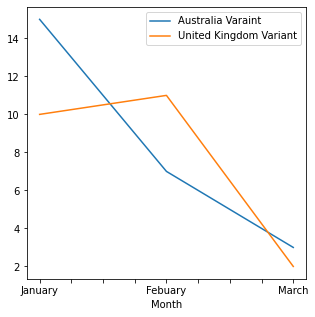

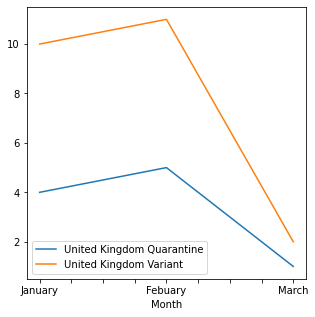

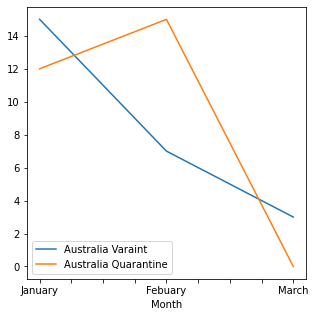

In [114]:
df_variant.plot(y=["Australia Varaint","United Kingdom Variant"],
        kind="line", figsize=(5, 5),)
df_variant.plot(y=["United Kingdom Quarantine","United Kingdom Variant"],
        kind="line", figsize=(5, 5),)
df_variant.plot(y=["Australia Varaint","Australia Quarantine"],
        kind="line", figsize=(5, 5),)


  

### 2.5 Insight

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The analysis of this data showed that, no, the United Kingdom was not more concernful of the new COVID-19 variants as they did not consistently have more appearances of *variant* in their newspaper headlines over the year of 2021 then Australia. While this was not established a key insight was that both countries tended to trend downwards over time in frequency of use of *variant* in newspaper headlines. This could indicate that there is a lack of overall concern from both countries for new variants of COVID-19 and even indicate that the public is becoming fatigued of stories on COVID-19. Possible fatigue of COVID-19 could be dangerous as if the public relaxes on intaking information on COVID-19 the public could become at risk of maintaining its high standard of prevention that was developed over the last year. I would make a recommendation to both governments of Australia and the United Kingdom to put efforts into making more engaging public information about COVID-19 topics (i.e. new variants) to curve the possible effects of COVID-19-intake-fatigue.	

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In terms of answering the question of whether a growth in concern for new variants of COVID-19 would lead to a growth in consideration for more quarantine, it was not the case for Australia as the data indicated an inverse relationship between the two variables. Although in the case of the United Kingdom it seemed clear that a growth in frequency in *variant* in newspaper headlines corresponded to a growth in frequency of *quarantine* in newspaper headlines. A possible insight this analysis could provide is that the United Kingdom public, or at least its media are more aware of the possible ramifications of a new variant of COVID-19 then that of Australia. A recommendation for the *Australian government* is to provide greater education on how to restrain COVID-19 through methods such as quarantining so they are not solely dependent on government ruling on decisions regarding quarantining.
